<a href="https://colab.research.google.com/github/azzazhr/PCVK_Ganjil_2025/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Azzahra Attaqina**

**NIM : 2341720224**

**Kelas : TI-3B**

**MODUL 10 PCVK (TUGAS PRAKTIKUM)**

**1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week10.ipynb”.**

**Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.**

**2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut**

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.**

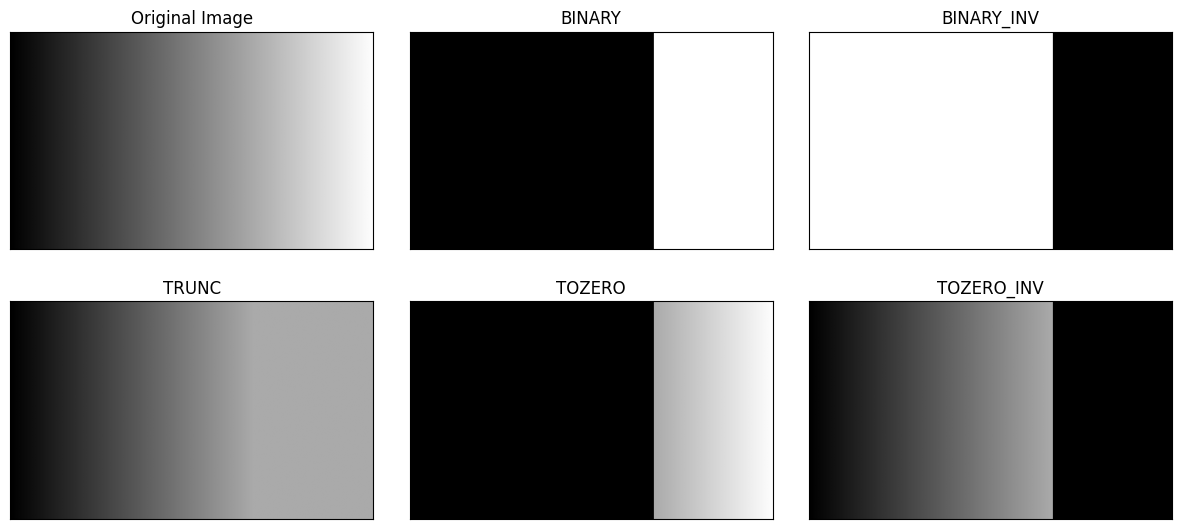

In [25]:
# Menentukan dimensi persegi panjang yang diinginkan (rasio 4:3)
width = 500
height = 300

# Buat gambar gradien dengan dimensi baru
gradient_final = np.linspace(0, 255, width, dtype=np.uint8)
img_final = np.tile(gradient_final, (height, 1))

# Menentukan nilai threshold dan nilai maksimum
thresh = 170
max_val = 255

# Menerapkan logika thresholding manual pada gambar
thresh_binary = np.where(img_final > thresh, max_val, 0).astype(np.uint8)
thresh_binary_inv = np.where(img_final > thresh, 0, max_val).astype(np.uint8)
thresh_trunc = np.where(img_final > thresh, thresh, img_final).astype(np.uint8)
thresh_tozero = np.where(img_final > thresh, img_final, 0).astype(np.uint8)
thresh_tozero_inv = np.where(img_final > thresh, 0, img_final).astype(np.uint8)

# Menampilkan semua hasil
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img_final, thresh_binary, thresh_binary_inv, thresh_trunc, thresh_tozero, thresh_tozero_inv]

plt.figure(figsize=(15, 7)) # Ukuran plot disesuaikan agar pas
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], 'gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
# Tambahkan baris ini untuk mengurangi jarak
plt.subplots_adjust(wspace=0.1, hspace=0.0001)
plt.show()

**4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


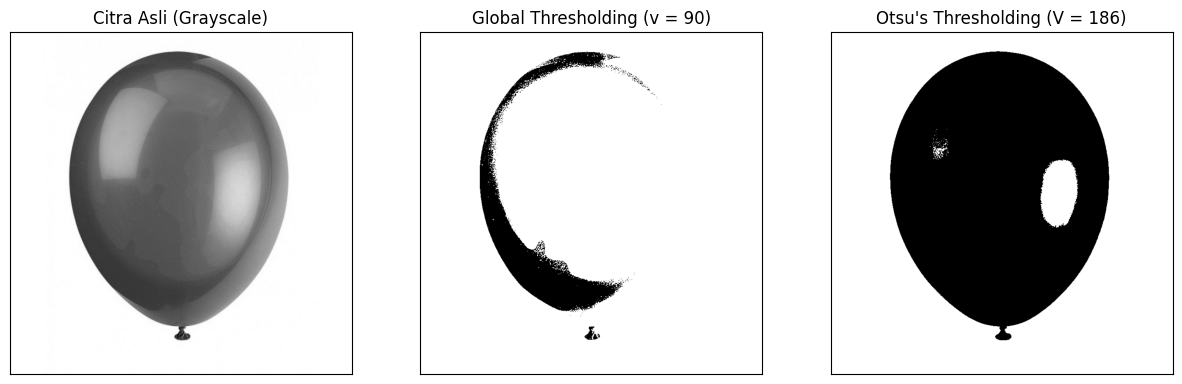

In [26]:
from google.colab import drive
drive.mount('/content/drive')

# Membaca file path
file_path = '/content/drive/MyDrive/PCVK/Images/balloon.jpg'

# Muat gambar asli (berwarna)
img_color = cv2.imread(file_path)

# Mengubah gambar ke Grayscale ---
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)


# lobal Thresholding (dijalankan pada gambar grayscale)
ret_global, global_thresh = cv2.threshold(img_gray, 90, 255, cv2.THRESH_BINARY)

# Implementasi Manual Otsu's Thresholding (dijalankan pada gambar grayscale)
def otsu_manual(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_norm = hist.ravel() / hist.sum()

    max_variance = 0
    optimal_thresh = 0

    for t in range(1, 256):
        w_b = np.sum(hist_norm[:t])
        w_f = np.sum(hist_norm[t:])

        if w_b == 0 or w_f == 0:
            continue

        mean_b = np.sum(np.arange(t) * hist_norm[:t]) / w_b
        mean_f = np.sum(np.arange(t, 256) * hist_norm[t:]) / w_f

        between_variance = w_b * w_f * (mean_b - mean_f) ** 2

        if between_variance > max_variance:
            max_variance = between_variance
            optimal_thresh = t

    return int(optimal_thresh)

# Dapatkan nilai threshold dari fungsi Otsu manual
otsu_thresh_val = otsu_manual(img_gray)

# Terapkan threshold hasil Otsu ke gambar
ret_otsu, otsu_thresh_img = cv2.threshold(img_gray, otsu_thresh_val, 255, cv2.THRESH_BINARY)

# Menampilkan semua hasil
# Citra Asli yang ditampilkan adalah versi grayscale
titles = [
    'Citra Asli (Grayscale)',
    'Global Thresholding (v = 90)',
    f"Otsu's Thresholding (V = {otsu_thresh_val})"
]
images = [img_gray, global_thresh, otsu_thresh_img]

plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

**Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.**

**Petunjuk:**

**a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.**

**b. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html**

**c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


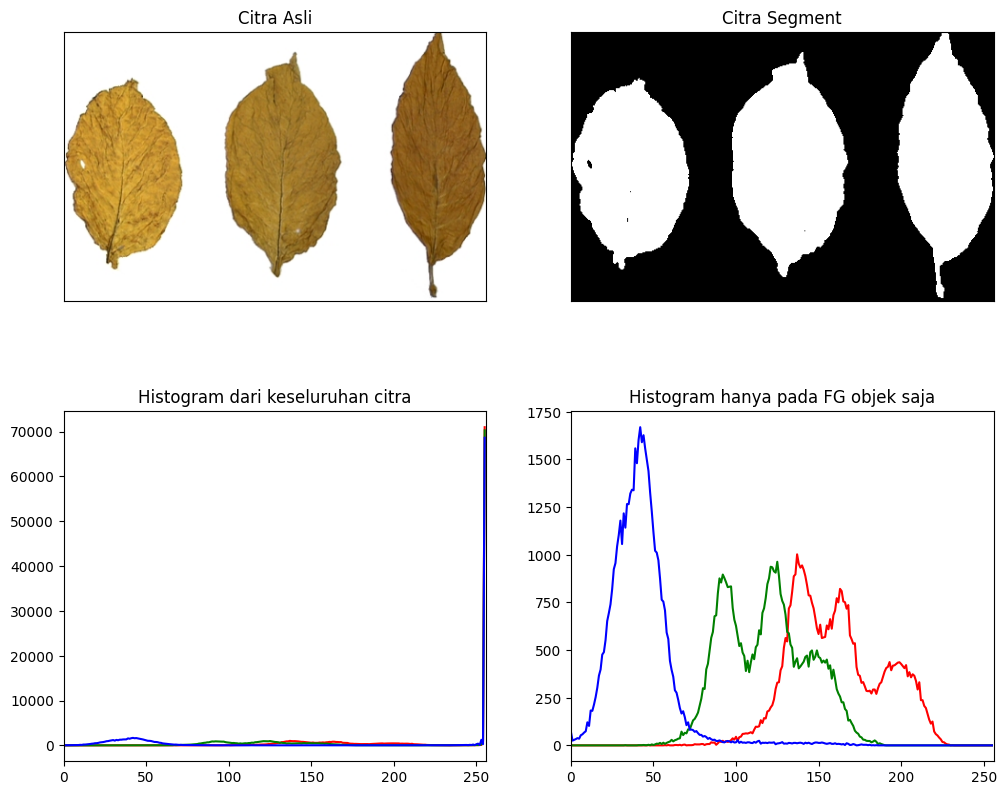

In [29]:
from google.colab import drive
drive.mount('/content/drive')

# Membaca file path
file_path = '/content/drive/MyDrive/PCVK/Images/tobacco.jpg'

# Muat gambar berwarna dari path yang sudah benar
img_color = cv2.imread(file_path)

# Konversi ke RGB untuk plotting yang benar di Matplotlib
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

# Membuat Mask (Citra Segment)
# Ubah ke grayscale untuk memudahkan thresholding
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
# Gunakan Otsu's Thresholding terbalik untuk memisahkan daun (gelap) dari background (putih)
# Hasilnya adalah mask di mana daun berwarna putih (255) dan background hitam (0)
ret, mask = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Menghtung histogram
colors = ('r', 'g', 'b') # Urutan channel untuk Matplotlib RGB

# Plotting
plt.figure(figsize=(12, 10))

# Panel 1: Citra Asli
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.xticks([]), plt.yticks([])

# Panel 2: Citra Segment (Mask)
plt.subplot(2, 2, 2)
plt.imshow(mask, 'gray')
plt.title('Citra Segment')
plt.xticks([]), plt.yticks([])

# Panel 3: Histogram Keseluruhan Citra
plt.subplot(2, 2, 3)
# Hitung dan plot histogram untuk setiap channel BGR dari gambar asli
for i, col in enumerate(colors):
    # Perhatikan urutan channel cv2 adalah BGR (0,1,2), kita plot sebagai RGB
    hist_full = cv2.calcHist([img_color], [2-i], None, [256], [0, 256])
    plt.plot(hist_full, color=col)
plt.xlim([0, 256])
plt.title('Histogram dari keseluruhan citra')

# Panel 4: Histogram Foreground Saja
plt.subplot(2, 2, 4)
# Hitung dan plot histogram dengan menggunakan mask
for i, col in enumerate(colors):
    hist_masked = cv2.calcHist([img_color], [2-i], mask, [256], [0, 256])
    plt.plot(hist_masked, color=col)
plt.xlim([0, 256])
plt.title('Histogram hanya pada FG objek saja')

plt.show()

**6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang
kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


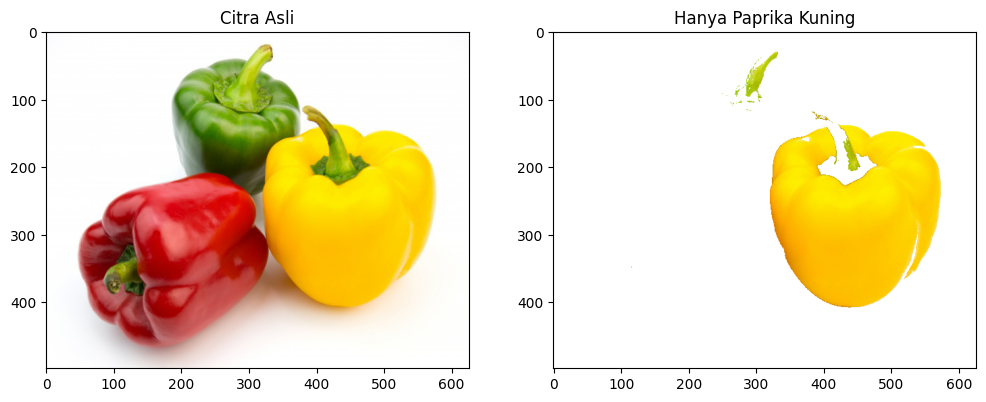

In [33]:
from google.colab import drive
drive.mount('/content/drive')

# Membaca file path
file_path = '/content/drive/MyDrive/PCVK/Images/peppers.jpg'

# Muat gambar berwarna dari path
img_color = cv2.imread(file_path)

# Konversi dari BGR ke RGB
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

# Persiapkan data untuk K-Means
pixel_values = img_rgb.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Menjalankan Algoritma K-Means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 5
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)

# Mengidentifikasi dan Isolasi Cluster Kuning
yellow_color = np.array([255, 255, 0])
distances = np.linalg.norm(centers - yellow_color, axis=1)
yellow_cluster_index = np.argmin(distances)

masked_data = np.copy(pixel_values)
masked_data[labels.flatten() != yellow_cluster_index] = [255, 255, 255]

masked_image = masked_data.reshape(img_rgb.shape)
masked_image = np.uint8(masked_image)

# Tampilkan hasil
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(masked_image)
plt.title('Hanya Paprika Kuning')
plt.show()

**Saat anda menampilkan warna tertentu, jelaskan kendala yang di hadapi dan mengapa
hal itu terjadi.**

Saat mencoba mengisolasi warna tertentu menggunakan K-Means, seperti pada kasus paprika kuning, beberapa kendala fundamental akan muncul karena cara kerja algoritma itu sendiri. Masalah utamanya adalah variasi pencahayaan dan bayangan. Algoritma K-Means tidak memahami konsep "objek", melainkan hanya mengelompokkan piksel berdasarkan nilai numerik warnanya. Akibatnya, area terang pada paprika karena pantulan cahaya dan area gelap karena bayangan dianggap sebagai warna yang berbeda, sehingga K-Means dapat menempatkannya ke dalam cluster yang terpisah. Hal ini menyebabkan hasil segmentasi objek menjadi tidak utuh atau "bolong-bolong".


Kendala ini berhubungan langsung dengan tantangan kedua, yaitu pemilihan jumlah cluster (k) yang tepat. Jika nilai k terlalu besar untuk mengakomodasi semua variasi warna, satu paprika kuning itu sendiri bisa terpecah menjadi beberapa cluster (misalnya, "kuning terang" dan "kuning gelap"), yang membuat proses isolasi menjadi lebih rumit. Sebaliknya, jika k terlalu kecil, warna yang berbeda namun mirip—seperti kuning dan hijau—bisa dipaksa masuk ke dalam satu cluster yang sama.


Terakhir, K-Means tidak memiliki pemahaman spasial, yang menimbulkan masalah kedekatan warna antar objek. Contohnya, batang hijau pada paprika kuning akan dikelompokkan bersama paprika hijau karena warnanya lebih mirip, sehingga bagian tersebut hilang dari hasil akhir. Secara keseluruhan, kendala-kendala ini menunjukkan bahwa K-Means adalah alat yang kuat untuk pengelompokan warna secara matematis, namun tidak memiliki pemahaman kontekstual seperti manusia, sehingga hasilnya seringkali merupakan aproksimasi yang tidak sempurna dari objek sebenarnya.

**7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda
pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code
dan hasil image di modul ini.**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


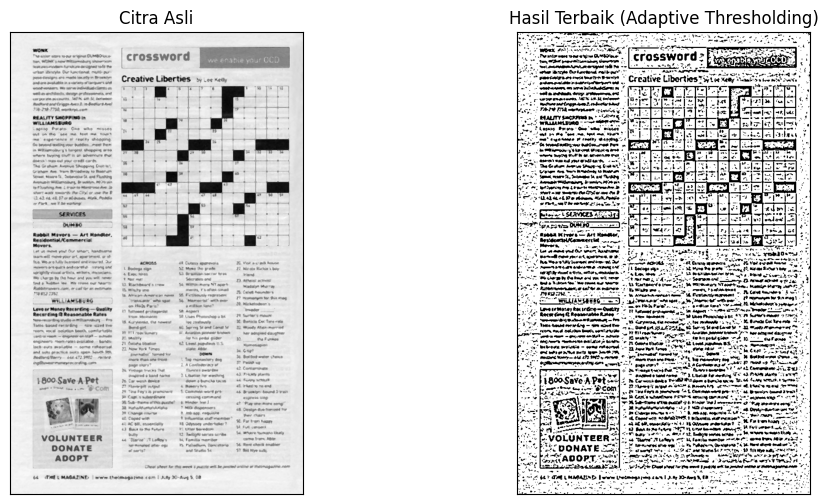

In [37]:
from google.colab import drive
drive.mount('/content/drive')

# Membaca file path
file_path = '/content/drive/MyDrive/PCVK/Images/crossword.jpg'

# Muat gambar dari path yang sudah benar
img = cv2.imread(file_path, 0)

# Pastikan gambar tidak blur untuk hasil yang lebih tajam
img = cv2.medianBlur(img, 3)

# Terapkan Adaptive Thresholding
# Parameter:
# - img: Gambar input
# - 255: Nilai maksimum yang diberikan jika piksel memenuhi syarat
# - cv2.ADAPTIVE_THRESH_GAUSSIAN_C: Metode thresholding adaptif [cite: 134]
# - cv2.THRESH_BINARY: Tipe threshold biner
# - 11: Ukuran blok area (Block Size) untuk menghitung threshold
# - 2: Konstanta C yang dikurangkan dari hasil perhitungan rata-rata atau bobot [cite: 135]
adaptive_thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY, 11, 2)

# Tampilkan hasil
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, 'gray')
plt.title('Citra Asli')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(adaptive_thresh, 'gray')
plt.title('Hasil Terbaik (Adaptive Thresholding)')
plt.xticks([]), plt.yticks([])

plt.show()
